In [28]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


import torch
from torch import nn 
import torchvision.models as models 
from torchvision import datasets,transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor,Lambda, Compose
from torchvision.io import read_image




In [29]:
data = [[1,2],[3,4]] # veri belirlenir
x_data = torch.tensor(data) # torch için tensor oluşturur.

np_data = np.array(data) # numpy array'e doldur 
x_data_from_numpy = torch.from_numpy(np_data) # numpy array'den tensor oluştur.

x_ones = torch.ones_like(x_data) # x_data tensorünün boyutlarında sadece 1 lerden oluşan tensor oluştur.
x_zeros = torch.zeros_like(x_data) #  '' ' ' ' ' ' ' sadece 0 lardan oluşan tensor oluştur.

data_shape = x_data.shape 
data_type = x_data.dtype

rand_tensor = torch.rand(data_shape) # random degerleri içeren data_shape boyutunda tensor oluştur.
ones_tensor = torch.ones(data_shape) # 1 içeren ' ' ' ' ' '...
zeros_tensor = torch.zeros(data_shape) # 0 içeren ' ' ' ' ' '...

bilgiler = {'veri_ham':data,
            'veri_tensor':x_data,
             'veri_numpy':np_data,
           'veri_numpy_tensor':x_data_from_numpy,
           'oneslike_tensor':x_ones,
           'zeroslike_tensor':x_zeros,
           'veri_tensor_shape':data_shape,
           'veri_tensor_dtype':data_type,
           'rand_tensor':rand_tensor,
           'ones_tensor':ones_tensor,
           'zeros_tensor':zeros_tensor}

for isim,icerik in bilgiler.items():
    print(isim," : ",icerik)

veri_ham  :  [[1, 2], [3, 4]]
veri_tensor  :  tensor([[1, 2],
        [3, 4]])
veri_numpy  :  [[1 2]
 [3 4]]
veri_numpy_tensor  :  tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
oneslike_tensor  :  tensor([[1, 1],
        [1, 1]])
zeroslike_tensor  :  tensor([[0, 0],
        [0, 0]])
veri_tensor_shape  :  torch.Size([2, 2])
veri_tensor_dtype  :  torch.int64
rand_tensor  :  tensor([[0.8402, 0.6322],
        [0.3992, 0.3779]])
ones_tensor  :  tensor([[1., 1.],
        [1., 1.]])
zeros_tensor  :  tensor([[0., 0.],
        [0., 0.]])


In [30]:
torch.cuda.is_available()

True

In [31]:
tensor = torch.rand(3,4)
print("Tensor device is ",tensor.device,"\n",tensor)
if torch.cuda.is_available():
    print("Cuda is available")
    tensor = tensor.to('cuda')
    print(tensor)

Tensor device is  cpu 
 tensor([[0.9630, 0.1911, 0.4291, 0.5236],
        [0.0327, 0.9426, 0.2166, 0.2959],
        [0.8944, 0.2775, 0.4851, 0.2570]])
Cuda is available
tensor([[0.9630, 0.1911, 0.4291, 0.5236],
        [0.0327, 0.9426, 0.2166, 0.2959],
        [0.8944, 0.2775, 0.4851, 0.2570]], device='cuda:0')


In [32]:
tensor = torch.ones_like(tensor)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]], device='cuda:0')


In [33]:
tensor = torch.cat([tensor,tensor],dim = 1 ) # concatenate, 1 vertical.
print("Tensor 2 : \n",tensor)

mul1 = tensor.mul(tensor)
mul2 = tensor * tensor 

print("\n------------\nMultiplication 1 \n",mul1,"\n------------\nMultipilication 2 \n",mul2)

print("Shape:",tensor.shape) 
matrixMul1 = tensor.matmul(tensor.T) # Matris çarpımı esnasında çarpım yapılabilmesi için sutun satıra eşit olmalıdır. Klasik lineer cebir.
matrixMul2 = tensor @ tensor.T # Bu yüzden matrislerden birisi transpozu alınır. (Birinci ya da ikinci olmasında ki fark ?) (W.T * X + b )
matrixMul3 = tensor.T @ tensor 

for i,v in zip(['Mul1','Mul2','Mul3'],[matrixMul1,matrixMul2,matrixMul3]):
    print(i,"::\n",v)

Tensor 2 : 
 tensor([[1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.]], device='cuda:0')

------------
Multiplication 1 
 tensor([[1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.]], device='cuda:0') 
------------
Multipilication 2 
 tensor([[1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.]], device='cuda:0')
Shape: torch.Size([3, 8])
Mul1 ::
 tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], device='cuda:0')
Mul2 ::
 tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], device='cuda:0')
Mul3 ::
 tensor([[3., 0., 3., 3., 3., 0., 3., 3.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [3., 0., 3., 3., 3., 0., 3., 3.],
        [3., 0., 3., 3., 3., 0., 3., 3.],
        [3., 0., 3., 3., 3., 0., 3., 3.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [3., 0.

In [34]:
tensor.add_(5)

tensor([[6., 5., 6., 6., 6., 5., 6., 6.],
        [6., 5., 6., 6., 6., 5., 6., 6.],
        [6., 5., 6., 6., 6., 5., 6., 6.]], device='cuda:0')

# Prepare Dataset

In [35]:
training_data = datasets.FashionMNIST(root="data",train=True,download=True,transform = ToTensor())
test_data = datasets.FashionMNIST(root="data",train=False,download=True,transform=ToTensor())

In [36]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [37]:
torch.randint(len(training_data),size=(1,))

tensor([40963])

In [38]:
sample_idx = torch.randint(len(training_data),size=(1,)).item()
sample_idx

40900

In [39]:
img , label = training_data[sample_idx]

In [40]:
print("image shape : ",img.shape)
print("label : ",label)

image shape :  torch.Size([1, 28, 28])
label :  0


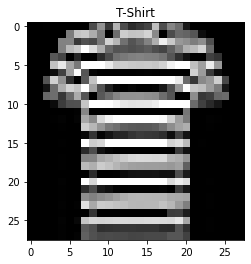

In [41]:
plt.title(labels_map[label])
plt.imshow(img.squeeze(),cmap='gray')

In [42]:
train_dataLoader = DataLoader(training_data, batch_size=64,shuffle = True)
test_dataLoader = DataLoader(test_data,batch_size=64,shuffle =True)

In [43]:
train_features, train_labels = next(iter(train_dataLoader))

In [44]:
img = train_features[0].squeeze() # Squeeze: (A x 1 x B x C x 1 x D) -> (A x B x C x D) : Tam olarak ne yapıyor ? 
label = train_labels[0] 

Text(0.5, 1.0, 'Sandal')

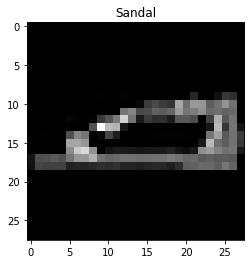

In [45]:
plt.imshow(img,cmap='gray')
plt.title(labels_map[label.item()])


# Build NN

In [46]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Active device:",device)

Active device: cuda


In [47]:
# Define class 
# Her NeuralNetwork class'ı __init__ ve forward methoduna sahiptir.

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(nn.Linear(28*28,512), 
                                               nn.ReLU(),
                                               nn.Linear(512,512),
                                               nn.ReLU(),
                                               nn.Linear(512,10),
                                               nn.ReLU())
    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    

In [48]:
model = NeuralNetwork().to(device) # Modelimizi mevcut 'device' üzerinde çalışmasını sağlar. Amacımız device'ı GPU olarak aktif edip, GPU'ya taşımak.
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [49]:
X = torch.rand(1,28,28,device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)

In [50]:
print(f"Predicted class: {y_pred}")

Predicted class: tensor([9], device='cuda:0')


In [51]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [52]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [53]:
layer1 = nn.Linear(in_features = 28*28, out_features = 20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [54]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU:{hidden1} ")

Before ReLU: tensor([[-0.1767,  0.0974,  0.3826, -0.0351, -0.2551,  0.4645, -0.1716,  0.1104,
          0.7048,  0.2467,  0.1085,  0.4576, -0.3028,  0.3171,  0.1312, -0.2769,
         -0.0429,  0.4436,  0.4297,  0.4059],
        [-0.1310,  0.1481,  0.2280, -0.0519, -0.1927,  0.4920, -0.4127, -0.1624,
          0.5016,  0.1353,  0.2371,  0.2194,  0.2305,  0.4117,  0.2129, -0.0438,
          0.0896,  0.4087,  0.5998,  0.4100],
        [ 0.1286,  0.0478,  0.1637, -0.0016, -0.1248,  0.0046, -0.1557, -0.0072,
          0.5256,  0.3617,  0.1472,  0.1687, -0.5080,  0.2277,  0.1199, -0.4173,
          0.0941,  0.8228,  0.4453,  0.2408]], grad_fn=<AddmmBackward>)


After ReLU:tensor([[0.0000, 0.0974, 0.3826, 0.0000, 0.0000, 0.4645, 0.0000, 0.1104, 0.7048,
         0.2467, 0.1085, 0.4576, 0.0000, 0.3171, 0.1312, 0.0000, 0.0000, 0.4436,
         0.4297, 0.4059],
        [0.0000, 0.1481, 0.2280, 0.0000, 0.0000, 0.4920, 0.0000, 0.0000, 0.5016,
         0.1353, 0.2371, 0.2194, 0.2305, 0.4117, 0.2129

In [55]:
seq_modules = nn.Sequential(flatten,
                           layer1,
                           nn.ReLU(),
                           nn.Linear(20,10)
                           )
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [56]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [57]:
print("Model Structure: ",model,"\n\n")
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values: {param[:2]} \n")

Model Structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: tensor([[-0.0027, -0.0281, -0.0029,  ..., -0.0301, -0.0037, -0.0041],
        [ 0.0149, -0.0314,  0.0241,  ...,  0.0300,  0.0169,  0.0302]],
       device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: tensor([-0.0044, -0.0171], device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values: tensor([[-0.0186, -0.0372,  0.0027,  ..., -0.0187, -0.0045,  0.0306],
        [-0.0046,  0.0170,  0.0091,  ..., -0.0190, -0.0038,  0.0001]],
       device='cuda:0'

# Backprop and Autograd 

In [58]:
x = torch.ones(5) # input tensor
y = torch.zeros(3) # expected output

w = torch.randn(5,3, requires_grad = True)
b = torch.randn(3, requires_grad = True)
z = x @ w + b # X ile W nun yeri önemli.

loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)

In [59]:
print('Weights\n',w)
print("\nbias\n",b)
print("\nZ\n",z)
print("Gradient function for z = ",z.grad_fn)
print("Gradient function for loss = ",loss.grad_fn)

Weights
 tensor([[ 0.9383,  0.0567, -0.0661],
        [ 1.3195,  0.9560,  0.6294],
        [ 1.0051, -0.0220,  1.7303],
        [-0.5259,  0.2078, -0.9661],
        [ 0.1154, -0.7371, -0.0954]], requires_grad=True)

bias
 tensor([-0.5009,  1.8373, -0.4601], requires_grad=True)

Z
 tensor([2.3514, 2.2986, 0.7720], grad_fn=<AddBackward0>)
Gradient function for z =  <AddBackward0 object at 0x000001E5AE6DF820>
Gradient function for loss =  <BinaryCrossEntropyWithLogitsBackward object at 0x000001E588960D60>


In [60]:
loss.backward() # loss hesaplar
print(w.grad) # Gradient değerleri w - lr * w_grad şeklinde güncelleme yapmamız
print(b.grad)

tensor([[0.3043, 0.3029, 0.2280],
        [0.3043, 0.3029, 0.2280],
        [0.3043, 0.3029, 0.2280],
        [0.3043, 0.3029, 0.2280],
        [0.3043, 0.3029, 0.2280]])
tensor([0.3043, 0.3029, 0.2280])


In [61]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [62]:
inp = torch.eye(5, requires_grad=True)
out = (inp+1).pow(2)
out.backward(torch.ones_like(inp), retain_graph=True)
print("First call\n", inp.grad)
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nSecond call\n", inp.grad)
inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nCall after zeroing gradients\n", inp.grad)

First call
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Second call
 tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradients
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])


# Training 

In [67]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)

In [68]:
learning_rate = 1e-3 # öğrenme oranı
batch_size = 64 
epochs = 3 # Optimizasyon döngüsü sayısı 
loss_fn = nn.CrossEntropyLoss() # loss function 
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate ) # optimizasyon algoritması 

In [69]:
def train_loop(dataloader,model,loss_fn,optimizer):
    size = len(dataloader.dataset)
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # compute pred  and loss
        pred = model(X)
        loss = loss_fn(pred,y)
        
        #backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0 :
            loss, current = loss.item(), batch * len(X)
            print(f"Train loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

            
def test_loop(dataloader,model,loss_fn):
    size = len(dataloader.dataset)
    test_loss,correct=0,0
    
    with torch.no_grad():
        for X,y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred,y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= size
    correct /= size
    print(f"Test Error : \n Test Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [70]:
for t in range(epochs):
    print(f"Epoch {t+1} \n ---------------------------------")
    train_loop(train_dataLoader, model, loss_fn, optimizer)
    test_loop(test_dataLoader, model, loss_fn)
print("...\n...\n...\n *** DONE! ***")


Epoch 1 
 ---------------------------------
Train loss: 2.308573 [    0/60000]
Train loss: 2.288735 [ 6400/60000]
Train loss: 2.277491 [12800/60000]
Train loss: 2.276008 [19200/60000]
Train loss: 2.253292 [25600/60000]
Train loss: 2.253844 [32000/60000]
Train loss: 2.250835 [38400/60000]
Train loss: 2.223993 [44800/60000]
Train loss: 2.207472 [51200/60000]
Train loss: 2.209946 [57600/60000]
Test Error : 
 Test Accuracy: 47.6%, Avg loss: 0.034549 

Epoch 2 
 ---------------------------------
Train loss: 2.220832 [    0/60000]
Train loss: 2.149021 [ 6400/60000]
Train loss: 2.147206 [12800/60000]
Train loss: 2.128823 [19200/60000]
Train loss: 2.128282 [25600/60000]
Train loss: 2.149498 [32000/60000]
Train loss: 2.088455 [38400/60000]
Train loss: 2.049463 [44800/60000]
Train loss: 2.101392 [51200/60000]
Train loss: 2.067056 [57600/60000]
Test Error : 
 Test Accuracy: 52.4%, Avg loss: 0.032157 

Epoch 3 
 ---------------------------------
Train loss: 2.039340 [    0/60000]
Train loss: 2.058

In [71]:
torch.save(model.state_dict(), "model_quick.pth")
print("Saved PyTorch Model State to model_quick.pth")

Saved PyTorch Model State to model_quick.pth


In [73]:
model_quick = NeuralNetwork().to(device)
model_quick.load_state_dict(torch.load("model_quick.pth"))

<All keys matched successfully>

In [74]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [75]:
model_quick.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

In [81]:
x, y = test_data[0][0], test_data[0][1]
x = x.to(device)
with torch.no_grad():
    pred = model_quick(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"
